---

title:  Who owns a dog in Groningen?

---

I'm going to analyze the dataset of the Groningen dogs owners to see who are they - people who owns the dog in Groningen?

Let's take a look at the data I collect and prepared, so maybe there are any correlations and relationships between different factors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("population_clean_data.csv") 

print(data.columns)
data.head()

Index(['buurtcode', 'buurtnaam', 'wijkcode', 'inwoners_per_km2',
       'perc_0_15_jaar', 'perc_15_25_jaar', 'perc_25_45_jaar',
       'perc_45_65_jaar', 'perc_65_en_ouder', 'perc_ongehuwd', 'perc_gehuwd',
       'perc_gescheid', 'perc_verweduwd', 'aantal_huishoudens',
       'perc_eenpersoonshuishoudens', 'perc_huishoudens_z_kind',
       'perc_huishoudens_met_kind', 'gemiddelde_huishoudsgrootte',
       'perc_west_migratie', 'perc_niet_west_migratie',
       'percentage_uit_marokko', 'perc_uit_antillen_en_aruba',
       'percentage_uit_suriname', 'percentage_uit_turkije',
       'perc_overige_nietwestersemigratie', 'bedrijven_landbouw',
       'gemid_won_waarde', 'perc_eengezinswoning', 'perc_meergezinswoning',
       'perc_koopwoningen', 'perc_huurwoningen',
       'perc_huurwoning_van_corporaties', 'perc_huurwoning_van_verhuurder',
       'perc_werknemers', 'perc_zelfstandigen',
       'gemiddeld_inkomen_per_inwoner', 'perc_huishoud_laag_inkomen',
       'perc_huishoud_hoog_inkomen

,buurtcode,buurtnaam,wijkcode,inwoners_per_km2,perc_0_15_jaar,perc_15_25_jaar,perc_25_45_jaar,perc_45_65_jaar,perc_65_en_ouder,perc_ongehuwd,...,gemiddeld_huishoudensinkomen,diefstal_af_uit_woning,diefstal_auto,diefstal_fiets,diefstal_af_uit_bedrijf,diefstal_af_uit_auto,aangiften_van_vernieling,aangiften_van_mishandeling,dogs_amount,politie_report_aantal
0,BU000000,Binnenstad-Noord,WK001400,11891.0,2.0,46.0,35.0,11.0,6.0,86.0,...,30.0,25.0,1.0,176.0,17.0,8.0,25.0,35.0,37,287.0
1,BU000001,Binnenstad-Zuid,WK001400,12011.0,2.0,47.0,33.0,11.0,6.0,87.0,...,30.7,42.0,3.0,306.0,28.0,30.0,96.0,196.0,51,701.0
2,BU000002,Binnenstad-Oost,WK001400,14979.0,3.0,40.0,36.0,14.0,7.0,84.0,...,27.8,17.0,1.0,56.0,2.0,3.0,16.0,8.0,48,103.0
3,BU000003,Binnenstad-West,WK001400,17507.0,2.0,38.0,40.0,11.0,9.0,84.0,...,29.7,9.0,0.0,13.0,2.0,4.0,8.0,5.0,21,41.0
4,BU000005,Hortusbuurt-Ebbingekwartier,WK001400,12509.0,5.0,41.0,30.0,15.0,9.0,82.0,...,32.1,20.0,2.0,68.0,16.0,9.0,24.0,13.0,108,152.0


First I'm going to get `numeric` columns and see the correlation matrix (but )

<AxesSubplot: title={'center': 'Correlation of numeric factors'}>

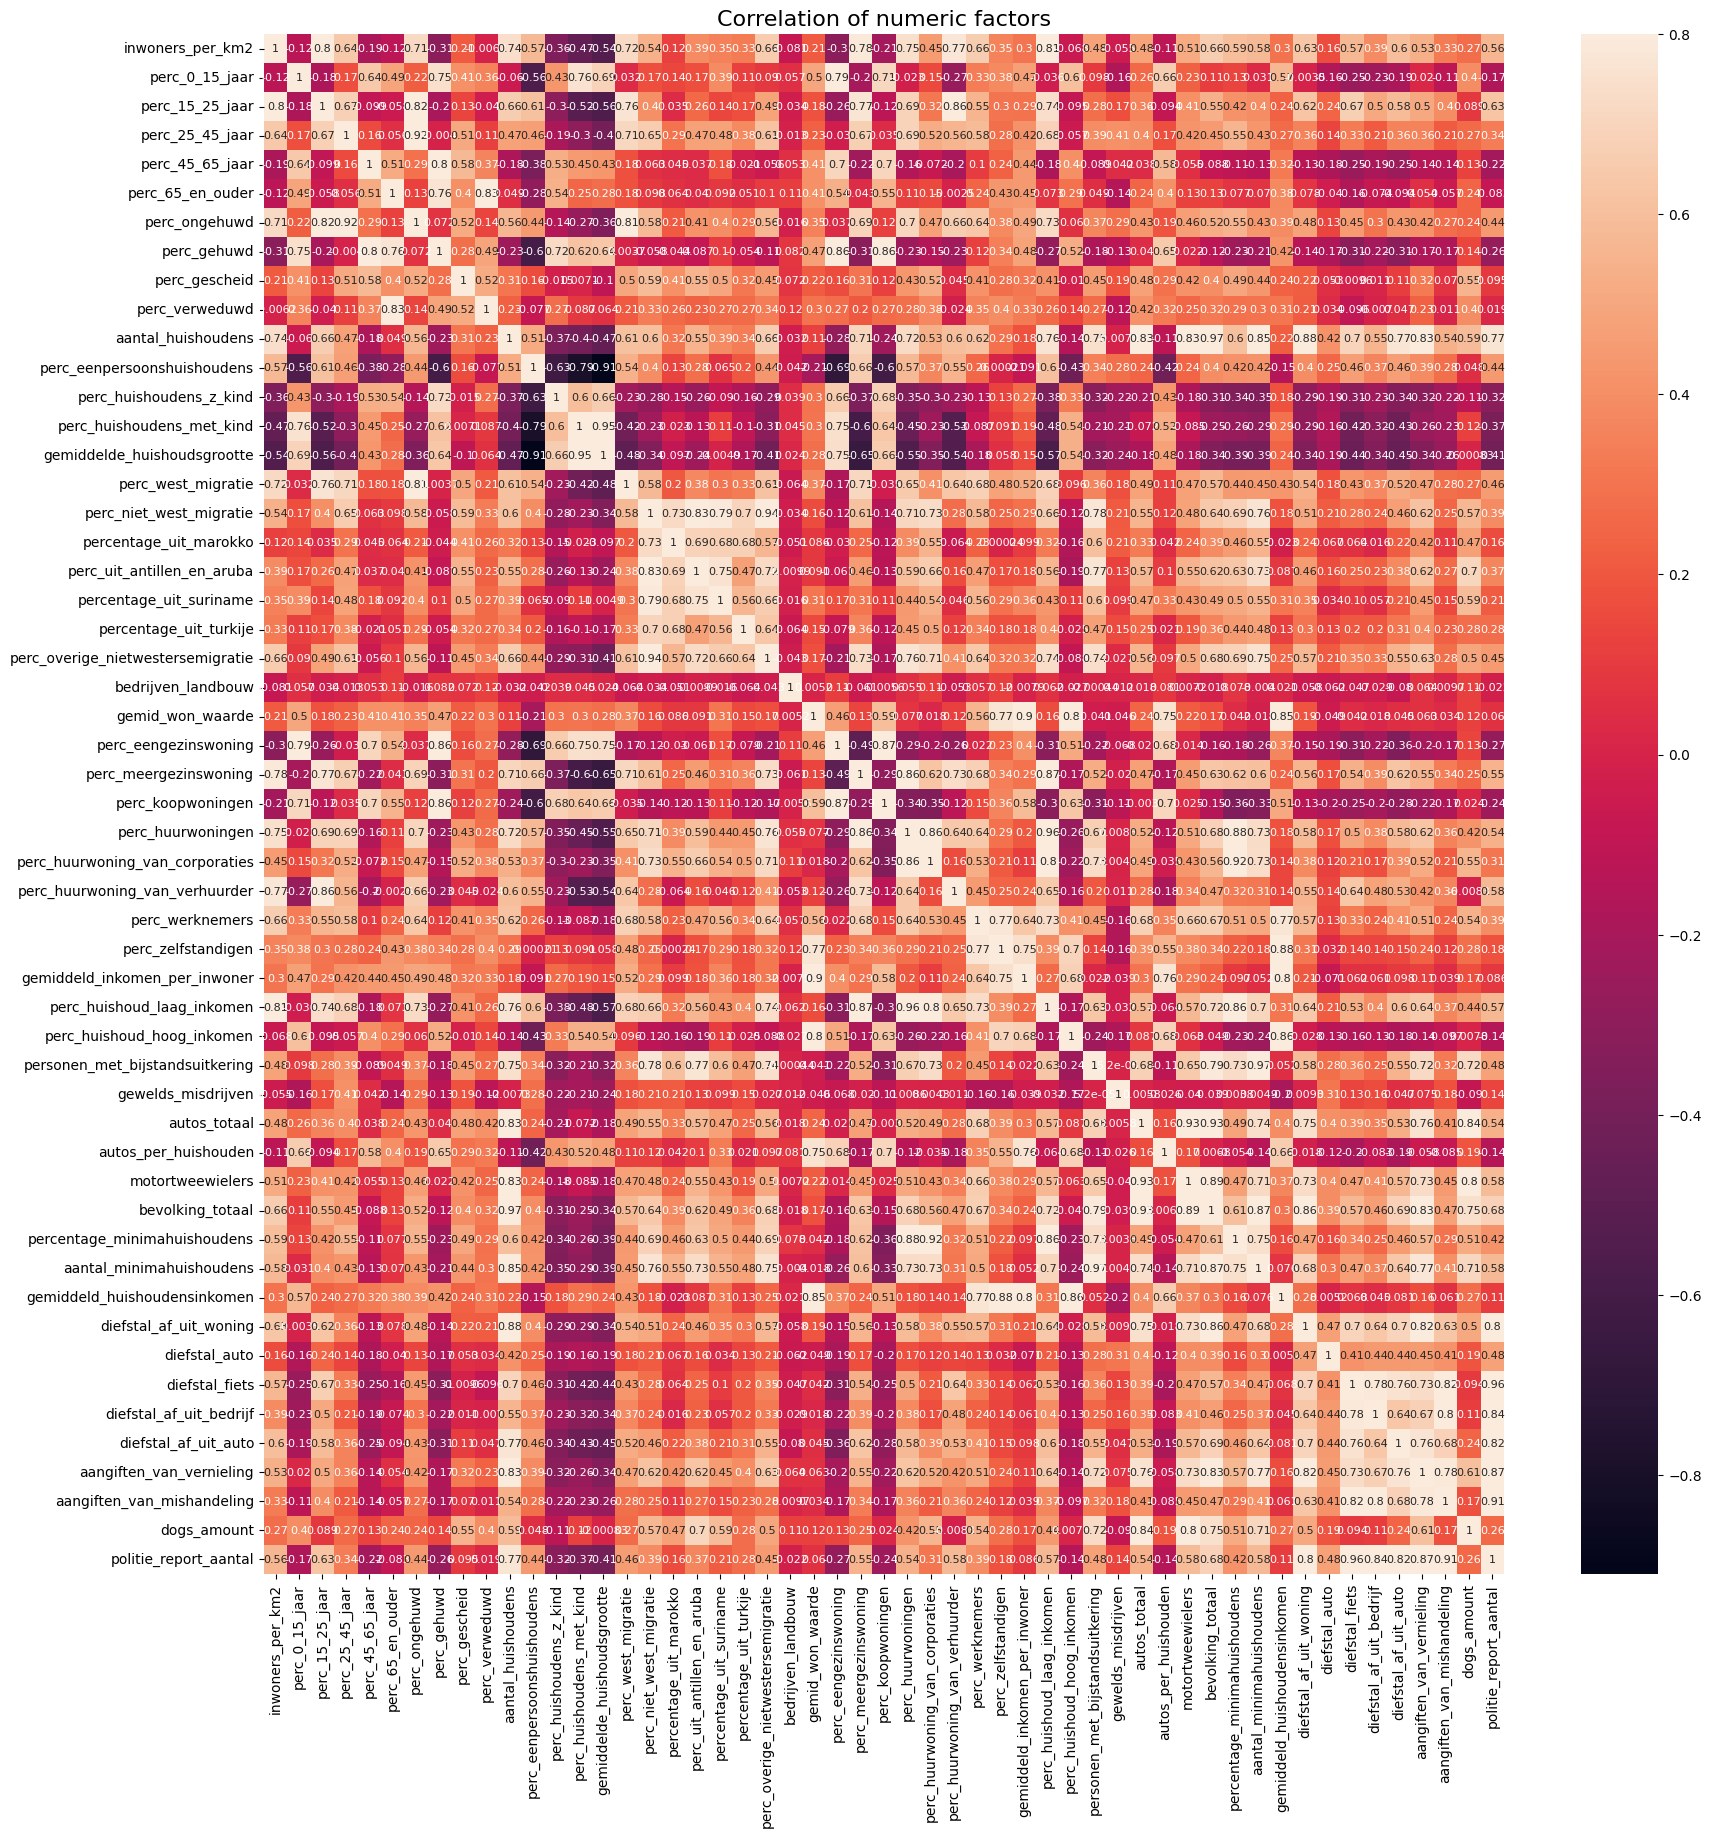

In [2]:
numeric_data = data.select_dtypes(include=[np.number])

corr_matrix = numeric_data.corr()
f, ax = plt.subplots(figsize = (20,20))
plt.title('Correlation of numeric factors', y = 1, size = 16)
sns.heatmap(corr_matrix, vmax = .8, annot_kws={'size': 8}, annot = True)

Looking at the picture of the correlation matrix (above) I can say that there are definately some correlations there, but because there are a lot of factors and poor readability of the matrix, it's difficult to say anything spetial, so let's take a closer look. We are interested in the dog's owners, so I will take a `dogs_amount` column and show it's correlation with other factors:

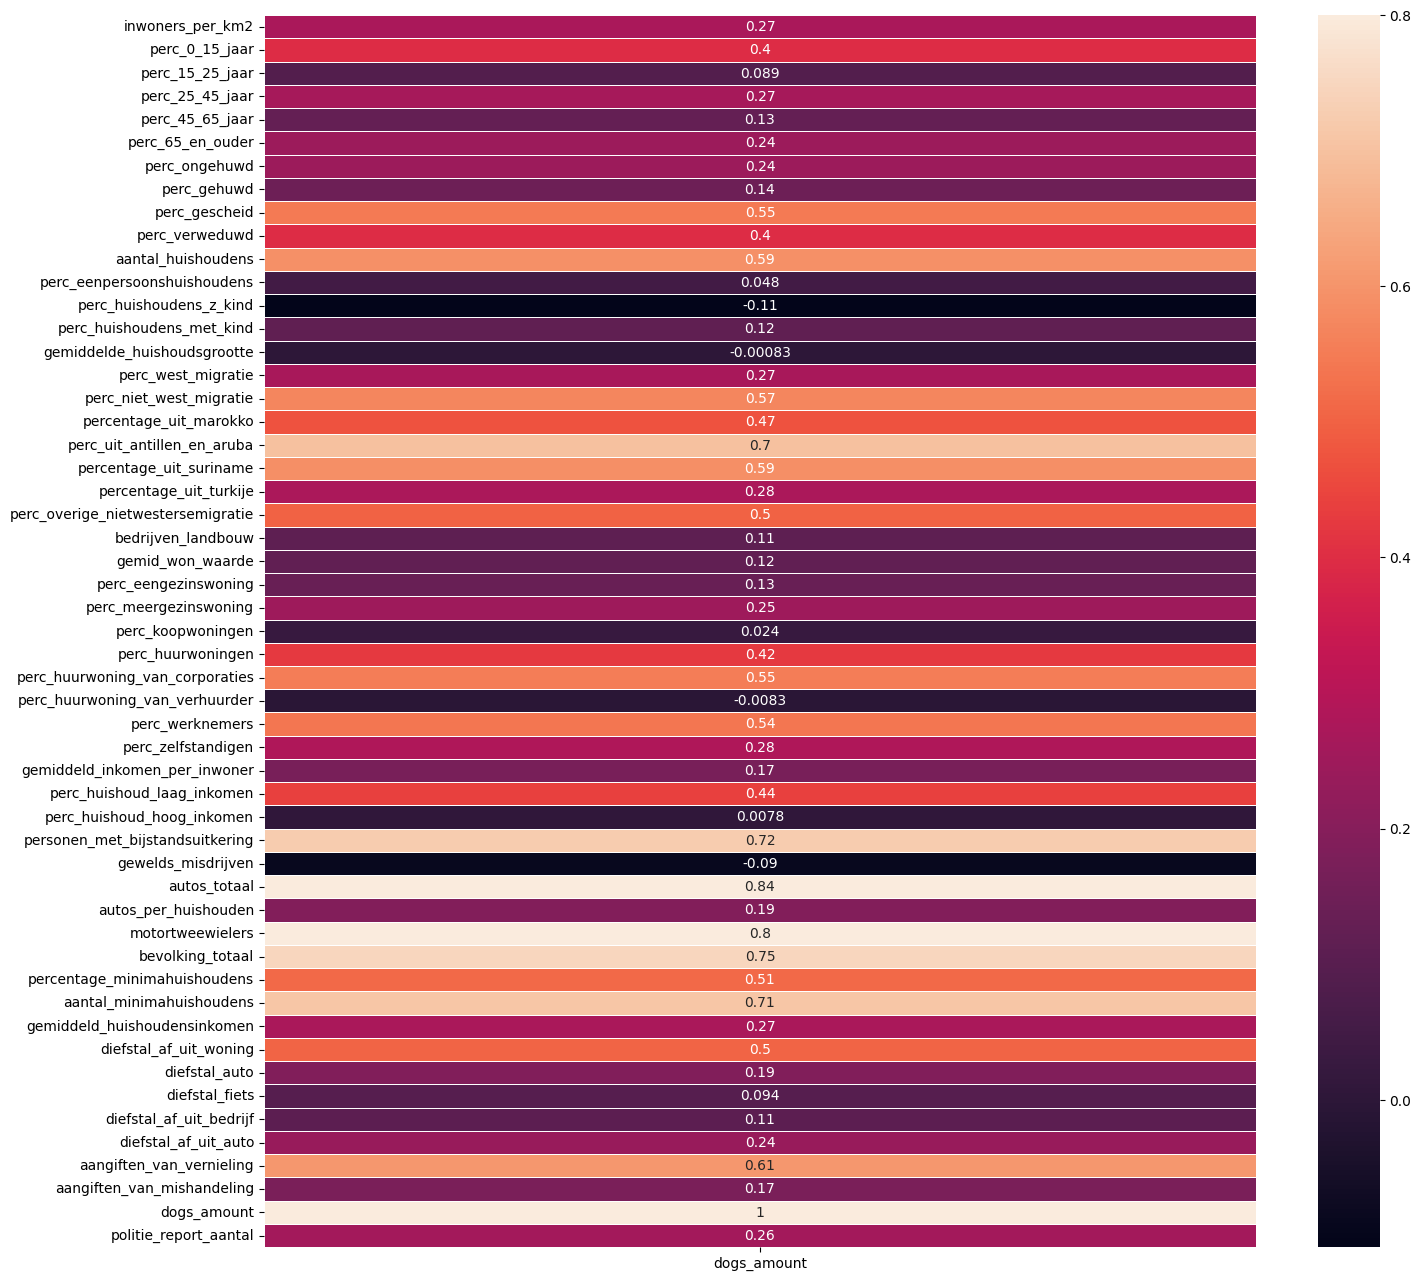

In [3]:
dogs_amount = corr_matrix[['dogs_amount']]
fig, ax = plt.subplots(figsize=(16, 16))
ax = sns.heatmap(dogs_amount, vmax = .8, annot_kws={'size': 10}, annot = True, linewidths=.5)

Now let's get only strong correlated columns:


In [4]:
corr_values = [row for row in dogs_amount.items()][0][1]
columns = [column for column in numeric_data.columns if corr_values[column] > 0.6]

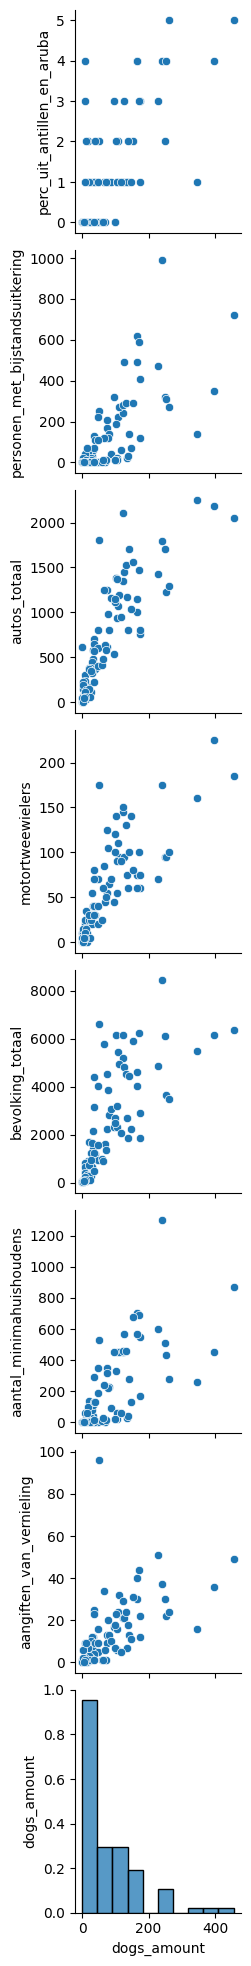

In [5]:
sns.pairplot(data = data,
             x_vars = ['dogs_amount'],
             y_vars = columns)

In [6]:
for column in columns:
    print(column + ": " + str(corr_values[column]))

perc_uit_antillen_en_aruba: 0.7000535645951397
personen_met_bijstandsuitkering: 0.722981338084339
autos_totaal: 0.8369100868143818
motortweewielers: 0.796743835950187
bevolking_totaal: 0.7475149616129847
aantal_minimahuishoudens: 0.709500199839632
aangiften_van_vernieling: 0.6056959022366318
dogs_amount: 1.0


As an answer to the question: "Who owns a dog in Groningen?"  we can see from the charts above, most of the dog's owners in Groningen have a car or two wheelers motorcycle, receive some welfare benefits and probably live in the area where they would experience destruction from other people more than in other places. Also I can see that probably people, who moved to the Netherlands from Netherlands Antilles and Aruba love dogs and have it at home more often them other people.